# Preliminary Analysis

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# drive connection
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# import the dataframe
feature_df = pd.read_csv("/content/drive/MyDrive/THESIS/dataset.csv")
feature_df

,id,institution,modality,age,sex,aneurysmType,aneurysmLocation,ruptureStatus,multipleAneurysms,medicalIstory
0,C0001,NiguardaHospitalMilan,3D-RA,53,F,LAT,ICA,U,False,NaN
1,C0002,NiguardaHospitalMilan,3D-RA,35,F,LAT,ICA,U,False,NaN
2,C0003,NiguardaHospitalMilan,3D-RA,43,F,TER,ICA,U,False,NaN
3,C0004,NiguardaHospitalMilan,3D-RA,60,F,TER,ICA,U,True,NaN
4,C0005,NiguardaHospitalMilan,3D-RA,26,F,LAT,ICA,R,False,NaN
...,...,...,...,...,...,...,...,...,...,...
90,C0095,NiguardaHospitalMilan,3D-RA,43,F,TER,BAS,F,False,NaN
91,C0096,NiguardaHospitalMilan,3D-RA,67,M,TER,BAS,R,False,NaN
92,C0097,NiguardaHospitalMilan,3D-RA,84,F,LAT,ICA,R,False,NaN
93,C0098,NiguardaHospitalMilan,3D-RA,59,F,TER,MCA,R,False,NaN


In [4]:
# drop the wrong inserted element
feature_df = feature_df.drop(feature_df[feature_df.ruptureStatus =='F'].index, axis = 0)

In [5]:
# see the dataframe
feature_df

,id,institution,modality,age,sex,aneurysmType,aneurysmLocation,ruptureStatus,multipleAneurysms,medicalIstory
0,C0001,NiguardaHospitalMilan,3D-RA,53,F,LAT,ICA,U,False,NaN
1,C0002,NiguardaHospitalMilan,3D-RA,35,F,LAT,ICA,U,False,NaN
2,C0003,NiguardaHospitalMilan,3D-RA,43,F,TER,ICA,U,False,NaN
3,C0004,NiguardaHospitalMilan,3D-RA,60,F,TER,ICA,U,True,NaN
4,C0005,NiguardaHospitalMilan,3D-RA,26,F,LAT,ICA,R,False,NaN
...,...,...,...,...,...,...,...,...,...,...
89,C0094,NiguardaHospitalMilan,3D-RA,36,F,TER,MCA,R,False,NaN
91,C0096,NiguardaHospitalMilan,3D-RA,67,M,TER,BAS,R,False,NaN
92,C0097,NiguardaHospitalMilan,3D-RA,84,F,LAT,ICA,R,False,NaN
93,C0098,NiguardaHospitalMilan,3D-RA,59,F,TER,MCA,R,False,NaN


### Initials Plots:

**Boxplot Age vs Multiple Aneurysms:**

Text(0.5, 1.0, 'Age Boxplot by Presence of Multiple Aneurysm')

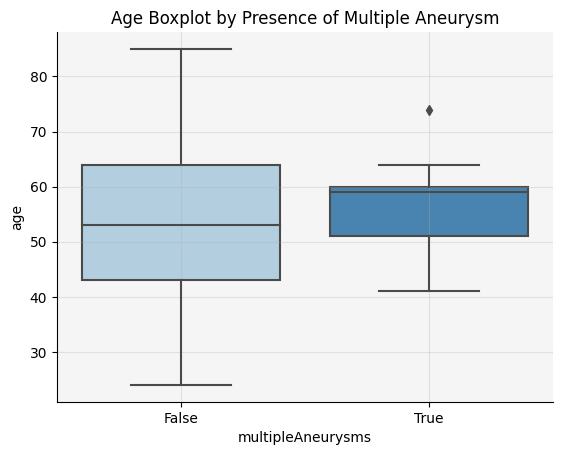

In [6]:
# select the data
data = feature_df[['age', 'multipleAneurysms']]
# build the graph
sns.boxplot(x='multipleAneurysms', y='age', data=data, palette="Blues")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True, linestyle='-', alpha=0.3)
plt.gca().set_facecolor('whitesmoke')
plt.title('Age Boxplot by Presence of Multiple Aneurysm')

**Comment**:

There are no important differences. The number of patients with multiple aneurysm is much higher, so it is prevedible that the box-plot results wider.

**Boxplot Age vs Type:**

Text(0.5, 1.0, 'Age Boxplot by Aneurysm Type')

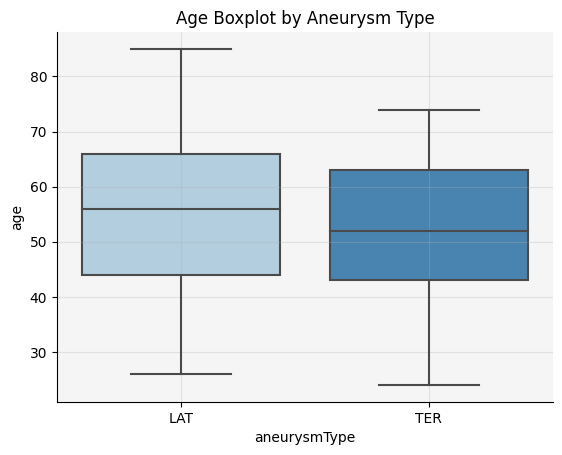

In [7]:
# select data
data = feature_df[['age', 'aneurysmType']]
# build the graph
sns.boxplot(x='aneurysmType', y='age', data=data, palette="Blues")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True, linestyle='-', alpha=0.3)
plt.gca().set_facecolor('whitesmoke')
plt.title('Age Boxplot by Aneurysm Type')

**Comment**:

Also here, there are no significant differences between the two. People with aneurysm on terminal portion ten to be slightly younger than those with aneurysm on lateral portion.

**Frequency Multiple Aneurysm by Location:**

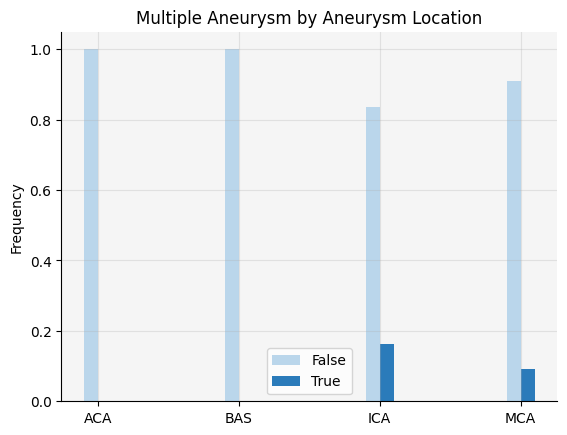

In [8]:
# select data
data = pd.crosstab(feature_df['multipleAneurysms'], feature_df['aneurysmLocation'])

# define the categories of aneurysm location
types = ("ACA", "BAS", "ICA", "MCA")
# create dictionary containing multiple aneurysm proportion
values = {'False': data.values[0].tolist()/data.values.sum(axis = 0),
          'True': data.values[1].tolist()/data.values.sum(axis = 0)}


x = np.arange(len(types))  # the label of locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()

# define color palettes
false_color = sns.color_palette("Blues")[1]
true_color = sns.color_palette("Blues")[4]

# plot the bars for lateral
ax.bar(x - width/2, values['False'], width, label='False', color=false_color)

# plot the bars for terminal
ax.bar(x + width/2, values['True'], width, label='True', color=true_color)


ax.set_ylabel('Frequency')
ax.set_title('Multiple Aneurysm by Aneurysm Location')
ax.set_xticks(x)
ax.set_xticklabels(types)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True, linestyle='-', alpha=0.3)
plt.gca().set_facecolor('whitesmoke')
ax.legend()

plt.show()

**Comment**:

There is a prevalence of non-multiple aneurysm. All the multiple anuerysm are on the ICA and MCA.

**Location by Type:**

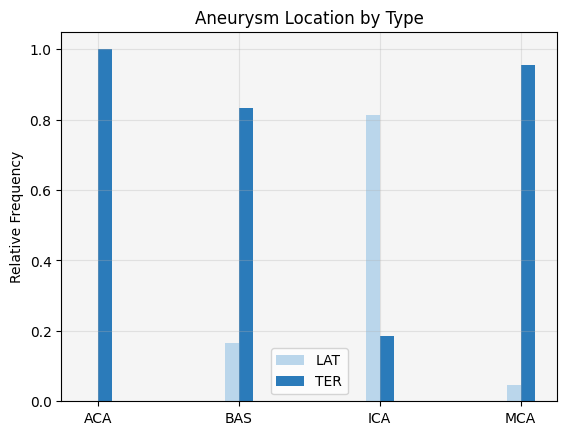

In [9]:
# select data
data = pd.crosstab(feature_df['aneurysmType'], feature_df['aneurysmLocation'])

# define the categories of aneurysm location
types = ("ACA", "BAS", "ICA", "MCA")
# create dictionary for aneurysm type proportion
values = {'LAT': data.values[0].tolist()/data.values.sum(axis = 0),
          'TER': data.values[1].tolist()/data.values.sum(axis = 0)}

x = np.arange(len(types))  # the label of locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()

# define color palettes
lateral_color = sns.color_palette("Blues")[1]
terminal_color = sns.color_palette("Blues")[4]

# plot the bars for lateral
ax.bar(x - width/2, values['LAT'], width, label='LAT', color=lateral_color)

# plot the bars for terminal
ax.bar(x + width/2, values['TER'], width, label='TER', color=terminal_color)

ax.set_ylabel('Relative Frequency')
ax.set_title('Aneurysm Location by Type')
ax.set_xticks(x)
ax.set_xticklabels(types)
plt.grid(True, linestyle='-', alpha=0.3)
plt.gca().set_facecolor('whitesmoke')
ax.legend()

plt.show()

**Comment**:

Lateral aneurysms characterized the ICA artery. ACA, BAS and MCA are prevalently subjected by terminal ones. Probably, the position of the aneurysm on different artery portion could also coincide with the fact of being lateral or terminal.

**Rupture by location:**

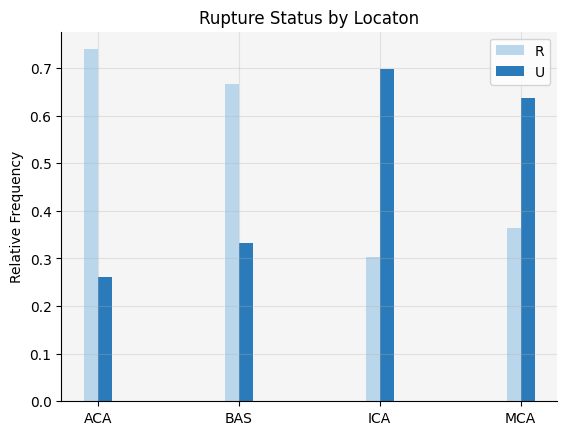

In [10]:
# select data
data = pd.crosstab(feature_df['ruptureStatus'], feature_df['aneurysmLocation'])

# define the categories of aneurysm location
types = ("ACA", "BAS", "ICA", "MCA")
# define the dictionary for rupture values proportion
values = {'R': data.values[0].tolist()/data.values.sum(axis = 0),
          'U': data.values[1].tolist()/data.values.sum(axis = 0)}

x = np.arange(len(types))  # the label of locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()

# create color palettes
ruptured_color = sns.color_palette("Blues")[1]
unruptured_color = sns.color_palette("Blues")[4]

# plot the bars for lateral
ax.bar(x - width/2, values['R'], width, label='R', color=ruptured_color)

# plot the bars for terminal
ax.bar(x + width/2, values['U'], width, label='U', color=unruptured_color)

ax.set_ylabel('Relative Frequency')
ax.set_title('Rupture Status by Locaton')
ax.set_xticks(x)
ax.set_xticklabels(types)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True, linestyle='-', alpha=0.3)
plt.gca().set_facecolor('whitesmoke')
ax.legend()

plt.show()

**Comment**:

The ICA and MCA are characterized by a higher presence of unruptured, with respect to the total numer of aneurysm on the artery. ACA and BAS have evidently a much higher proportion of ruptured aneurysms.

**Age Distribution:**

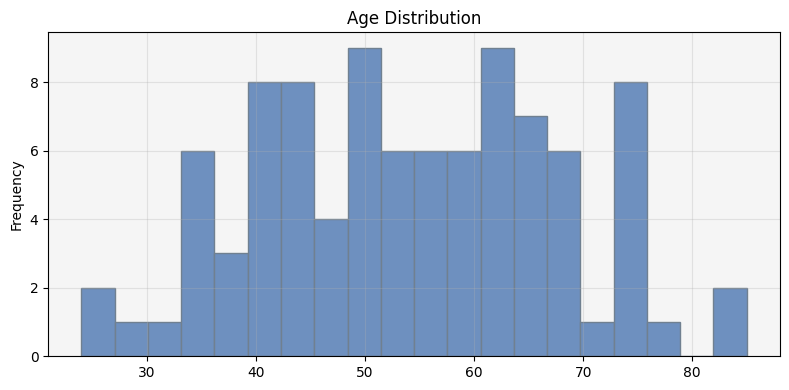

In [12]:
# define the color palette
color_palette = sns.color_palette("vlag")
# make the plot of age distribution
feature_df['age'].plot(kind='hist', color = color_palette, bins=20, title='age', edgecolor='slategrey', figsize=(8*1, 4*1))
plt.grid(True, linestyle='-', alpha=0.3)
plt.gca().set_facecolor('whitesmoke')
plt.title('Age Distribution')
plt.tight_layout()

**Comment**:

The Adge distribution presents higher frequencies on older ages. There is only another pick around 20 years old.

**Frequency of Aneurysm Locations:**

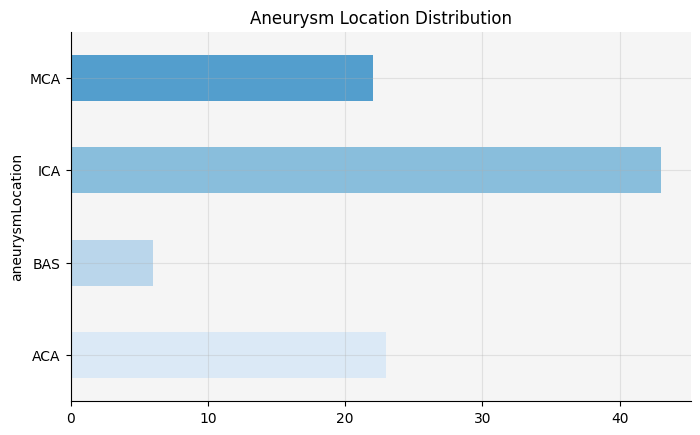

In [13]:
# define the color palette
color_palette = sns.color_palette("Blues")
# make the plot
feature_df.groupby('aneurysmLocation').size().plot(kind='barh', color= color_palette, figsize=(8*1, 4.8*1))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Aneurysm Location Distribution')
plt.grid(True, linestyle='-', alpha=0.3)
plt.gca().set_facecolor('whitesmoke')

**Comment**:

The most common aneurysms are those on ICA artery. Followed by ACA and MCA, the rare one are those on the BAS artery.

**Sex vs Rupture:**

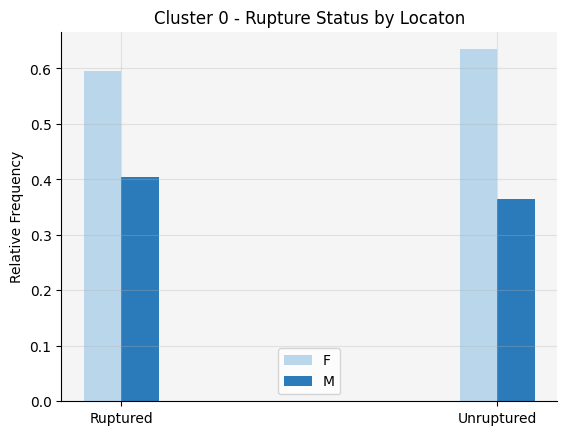

In [ ]:
# select the data
data = pd.crosstab(feature_df['sex'], feature_df['ruptureStatus'])

#
types = ("Ruptured", "Unruptured")
values = {'F': data.values[0].tolist()/data.values.sum(axis = 0),
          'M': data.values[1].tolist()/data.values.sum(axis = 0)}

x = np.arange(len(types))  # the label of locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()

ruptured_color = sns.color_palette("Blues")[1]
unruptured_color = sns.color_palette("Blues")[4]

# Plot the bars for lateral
ax.bar(x - width/2, values['F'], width, label='F', color=ruptured_color)

# Plot the bars for terminal
ax.bar(x + width/2, values['M'], width, label='M', color=unruptured_color)

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Relative Frequency')
ax.set_title('Cluster 0 - Rupture Status by Locaton')
ax.set_xticks(x)
ax.set_xticklabels(types)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True, linestyle='-', alpha=0.3)
plt.gca().set_facecolor('whitesmoke')
ax.legend()

plt.show()

**Comment**:

There is no evidence of higher proportion of ruptured aneurysms on a specific sex.